In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# 1. Data

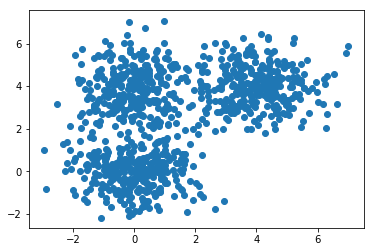

In [10]:
D = 2
s = 4

mu1 = np.array([0,0])
mu2 = np.array([s,s])
mu3 = np.array([0,s])

N = 900
X = np.zeros((N, D))

X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

plt.scatter(X[:,0], X[:,1])
plt.show()

# 2. KMeans

In [16]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)
        # assert(np.abs(R - R2).sum() < 1e-10)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    # color is 3 dimension
    if show_plots:
        plt.plot(costs)
        
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors) # N * 3
        plt.scatter(X[:,0], X[:,1], c=colors)

        plt.show()

    return M, R

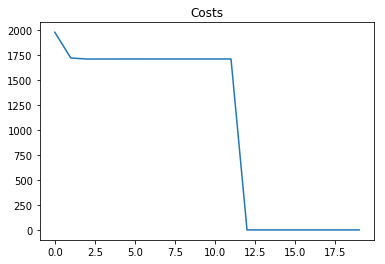

[[ 0.24299604  0.3990842   0.5824499 ]
 [ 0.24275995  0.39925682  0.5825037 ]
 [ 0.24275995  0.39925682  0.5825037 ]
 ..., 
 [ 0.71441631  0.05440496  0.47501235]
 [ 0.71462476  0.05426739  0.47494333]
 [ 0.71462154  0.0542549   0.47496558]]


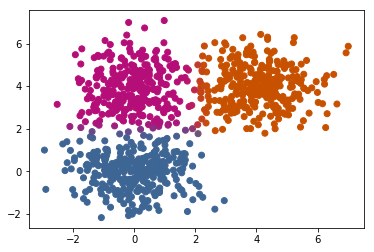

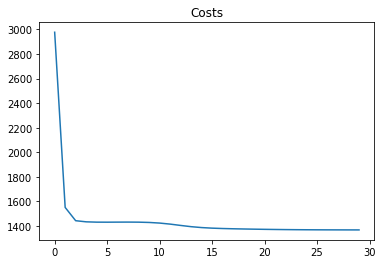

[[ 0.56682887  0.96645779  0.28155642]
 [ 0.62111086  0.97864153  0.24330901]
 [ 0.6211069   0.97864064  0.24331181]
 ..., 
 [ 0.16485825  0.87780967  0.5328367 ]
 [ 0.08268736  0.87436318  0.22971064]
 [ 0.04320986  0.87677427  0.08575606]]


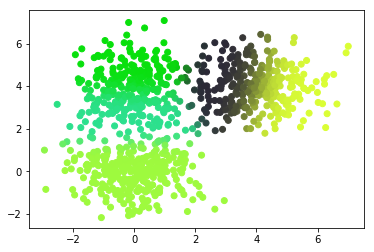

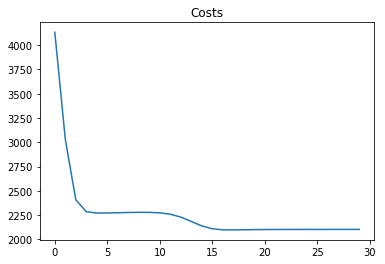

[[ 0.14178099  0.51986869  0.07695328]
 [ 0.11599245  0.48078426  0.01454353]
 [ 0.11679004  0.48194629  0.01654086]
 ..., 
 [ 0.2293912   0.66596012  0.27448817]
 [ 0.25281545  0.66990896  0.29726707]
 [ 0.23414348  0.68464831  0.27488634]]


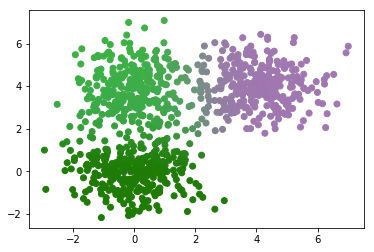

(array([[ 3.98442199,  3.99957319],
        [-0.00463122, -0.07170656],
        [ 0.0880906 ,  3.70140381],
        [ 0.08239217,  3.6199542 ],
        [ 3.97755065,  3.99949964]]),
 array([[  3.96102112e-06,   7.77394510e-01,   1.03552420e-01,
           1.19045014e-01,   4.09582237e-06],
        [  2.15315966e-05,   9.97109098e-01,   1.25952600e-03,
           1.58791329e-03,   2.19314425e-05],
        [  1.11858204e-05,   9.90242487e-01,   4.36484941e-03,
           5.37003113e-03,   1.14466872e-05],
        ..., 
        [  9.18995954e-04,   3.88152500e-02,   4.70528622e-01,
           4.88794918e-01,   9.42214235e-04],
        [  2.53007983e-02,   4.36371776e-03,   4.75347853e-01,
           4.69239095e-01,   2.57485356e-02],
        [  1.21135180e-03,   1.33778906e-03,   5.07028838e-01,
           4.89179972e-01,   1.24204913e-03]]))

In [15]:
K = 3
plot_k_means(X, K)

K = 5
plot_k_means(X, K, max_iter=30)

K = 5
plot_k_means(X, K, max_iter=30, beta=0.3)

# 3. Kmeans by iteration

In [17]:
def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)

    for i in range(max_iter):
        # moved the plot inside the for loop
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)

        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()

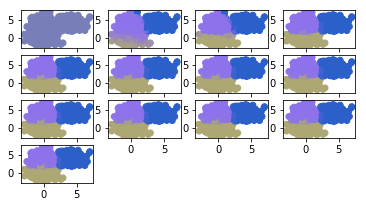

In [19]:
K = 3 # luckily, we already know this
plot_k_means(X, K)

# K = 5 # what happens if we choose a "bad" K?
# plot_k_means(X, K, max_iter=30)

# K = 5 # what happens if we change beta?
# plot_k_means(X, K, max_iter=30, beta=0.3)